# Data Exploration

File loads in the .csv file for the australian horses data from kaggle and plots a few bits to see if there are any interesting insights

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
# columns to read
col = ['position','position_again','position_two','margin','bf_odds','betfair_slope',
           'market_id','date','market_name', 'condition','weather','runner_id','barrier','dfs_form_rating',
           'tech_form_rating','handicap_weight','last_five_starts','prize_money',
           'sex','age','last_twenty_starts','field_strength','days_since_last_run']

# Specify dtypes to save memory when reading
data_types = {'position' : float,'position_again' : float,'position_two' : float,'margin' : float,
              'bf_odds' : float,'betfair_slope' : float, 'market_id' : float, 'date':str,'market_name':str, 
              'condition' : str,'weather' : str,'runner_id' : float,'barrier' : float,
              'dfs_form_rating' : float,'tech_form_rating' : float,'last_five_starts' : str,
              'prize_money' : float, 'sex' : str,'age' : float,'last_twenty_starts' : str,
              'field_strength' : float,'days_since_last_run' : float, 'handicap_weight' : float}


In [105]:
horses = pd.read_csv('input/horses.csv',sep = ',', usecols = col, 
                     index_col = 'market_id', dtype = data_types)

In [120]:
horses.head()

,position,position_again,position_two,margin,bf_odds,betfair_slope,date,market_name,condition,weather,...,handicap_weight,last_five_starts,prize_money,sex,age,last_twenty_starts,field_strength,days_since_last_run,year,month
market_id,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,1.0,1.0,0.0,2.88,-0.001514,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,58.5,f3,2160.0,Gelding,3.0,f3,-1.5,14.0,2016,6
1.0,0.0,2.0,2.0,NaN,15.00,-0.000805,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,58.5,x80x2,21175.0,Gelding,5.0,f0x6x80x2,-2.0,39.0,2016,6
1.0,0.0,3.0,3.0,NaN,95.00,0.209409,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,56.5,79x00,28855.0,Mare,6.0,f68477579x00,-1.5,15.0,2016,6
1.0,0.0,0.0,4.0,NaN,20.00,0.014119,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,56.5,f0,1475.0,Filly,3.0,f0,NaN,15.0,2016,6
1.0,0.0,0.0,5.0,NaN,2.74,0.000521,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,56.5,f4x,1215.0,Filly,3.0,f4x,-3.5,173.0,2016,6


In [115]:
horses.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 195391 entries, 1.0 to 34587.0
Data columns (total 22 columns):
position               195391 non-null float64
position_again         195391 non-null float64
position_two           191175 non-null float64
margin                 133677 non-null float64
bf_odds                195391 non-null float64
betfair_slope          195330 non-null float64
date                   195391 non-null datetime64[ns]
market_name            195391 non-null object
condition              192623 non-null object
weather                192702 non-null object
runner_id              195391 non-null float64
barrier                195391 non-null float64
dfs_form_rating        195381 non-null float64
tech_form_rating       195391 non-null float64
handicap_weight        195391 non-null float64
last_five_starts       184731 non-null object
prize_money            194889 non-null float64
sex                    194889 non-null object
age                    194889 non-nu

In [121]:
# get the months as a separate column...might be useful
horses['date'] = pd.to_datetime(horses['date'], format = '%Y-%m-%d')

horses['month'] = pd.DatetimeIndex(horses['date']).month

In [125]:
# The going
horses['condition'].unique()

array(['HVY9', 'HVY10', 'GOOD4', 'HVY8', 'AWT', 'SOFT6', 'SOFT5', 'SOFT7',
       'GOOD3', nan, 'GOOD', 'FIRM2', 'HEAVY'], dtype=object)

In [126]:
#weather
horses['weather'].unique()

array(['FINE', 'OCAST', 'SHWRY', nan], dtype=object)

In [143]:
#market_name
len(horses['market_name'].unique())

names = ['first','distance','third']
for i, name in enumerate(names):
    horses[name] = horses['market_name'].apply(lambda x : x.split()[i])

<BarContainer object of 22 artists>

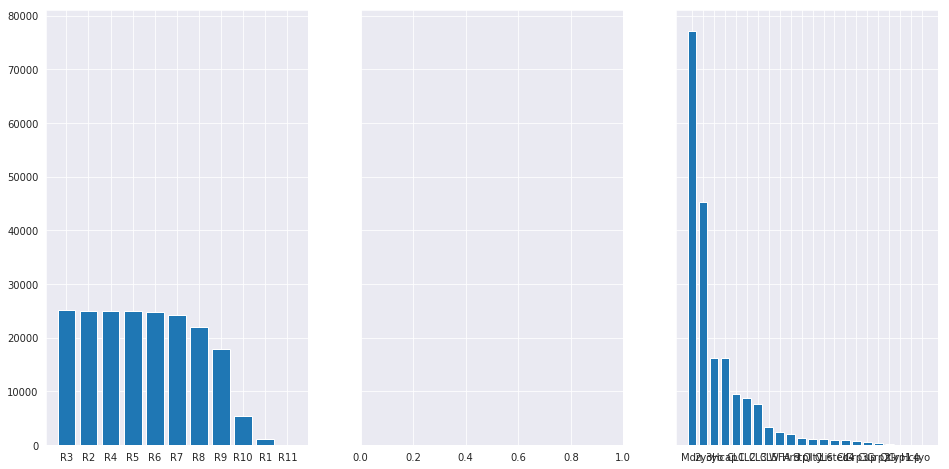

In [158]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (16,8))
ax1.bar(horses['first'].unique(), horses['first'].value_counts())
ax3.bar(horses['third'].unique(), horses['third'].value_counts())


# horses['third'].value_counts().plot(kind='bar')



In [159]:
horses[['market_name']].head(50)

,market_name
market_id,
1.0,R3 1200m Mdn
1.0,R3 1200m Mdn
1.0,R3 1200m Mdn
1.0,R3 1200m Mdn
1.0,R3 1200m Mdn
1.0,R3 1200m Mdn
1.0,R3 1200m Mdn
1.0,R3 1200m Mdn
1.0,R3 1200m Mdn


In [141]:
parts['third'].value_counts()

Hcap      77216
Mdn       45218
CL1       16255
3yo       16130
CL2        9426
2yo        8800
CL3        7559
Listed     3369
CL5        2304
Grp3       2012
CL6        1241
CL4        1164
Cup        1085
Grp2        984
Grp1        974
Hrd         701
Qlty        461
Stpl        308
WFA         130
Hcp          28
4yo          15
Qtly         11
Name: market_name, dtype: int64

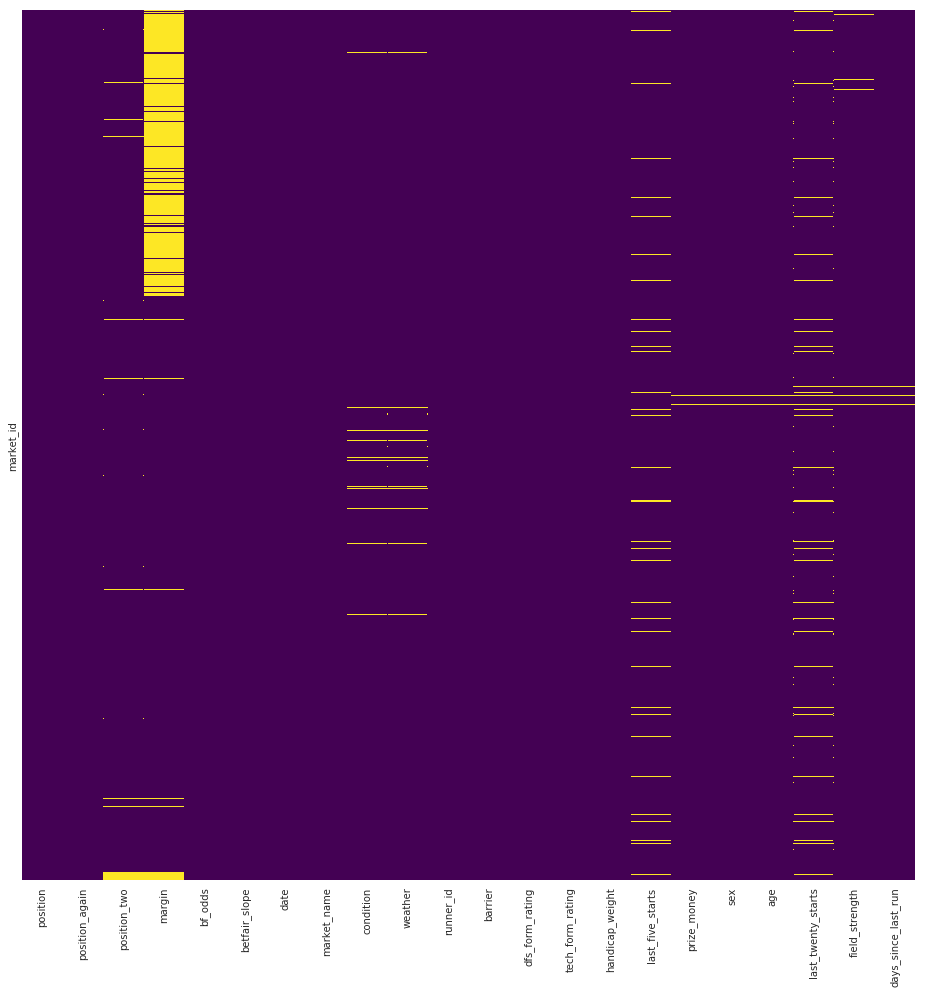

In [113]:
# Plot to see where the null values are
plt.figure(figsize = (16,16))
sns.heatmap(data = horses.isnull(), yticklabels = False, cbar = False,linewidths = 0, cmap = 'viridis')


Yellow = Missing Data <br>
comments: <br>
position_again -  data entered is just those horses which places so can fill in the rest with 0<br>
position_two - exact position - shouldn't be any missing - amount missing is minimal<br>
margin - 30 % of dataset missing - this is a bit annoying as would potentially be a good feature<br>
some entries just don't have much data on them so I'll drop them.<br>

THIS IS GENERALLY REPRESENTATIVE OF THE WHOLE DATASET, I'VE JUST LOADED A SUBSET DUE TO MEMORY ISSUES

In [109]:
# # code for comparing whether data is missing for an entire race or just a couple of runners.
x_over = list(set(horses[horses['barrier'].isnull()].index) & 
              set(horses.dropna(subset = ['barrier']).index) )# market ids which have runners 
                                                                #with and without barrier data
print('Number of races with a runner missing barrier data: ' + str(len(x_over)))
print('Total number of horses in races where some horses don''t have barrier info: ' +
      str(horses.loc[x_over].shape[0]))
print('Percentage of runners in those races which have barrier data:{:10.2f}%'
      .format(horses.dropna(subset = ['barrier']).loc[x_over].shape[0]/ horses.loc[x_over].shape[0] *100))



Number of races with a runner missing barrier data: 45
Total number of horses in races where some horses dont have barrier info: 453
Percentage of runners in those races which have barrier data:     74.61%


In [110]:
# Decided to drop all missing data and have partial data for a race.  
# Think this is valid, but depends on if any of those with missing data, won/placed
horses.dropna(subset = ['barrier'], inplace = True)


In [111]:
number_of_races = len(horses.index.unique())

In [112]:
# position_again = horses which placed
horses['position_again'].fillna(value = 0, inplace = True)

### That's tidy enough for now.  Lets plot some graphs 

In [102]:
sns.set_style('darkgrid')

In [103]:
horses.head()

,position,position_again,position_two,margin,bf_odds,betfair_slope,date,market_name,condition,weather,...,barrier,dfs_form_rating,tech_form_rating,last_five_starts,prize_money,sex,age,last_twenty_starts,field_strength,days_since_last_run
market_id,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,1.0,1.0,0.0,2.88,-0.001514,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,3.0,97.0,97.0,f3,2160.0,Gelding,3.0,f3,-1.5,14.0
1.0,0.0,2.0,2.0,NaN,15.00,-0.000805,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,10.0,82.0,82.0,x80x2,21175.0,Gelding,5.0,f0x6x80x2,-2.0,39.0
1.0,0.0,3.0,3.0,NaN,95.00,0.209409,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,6.0,62.0,62.0,79x00,28855.0,Mare,6.0,f68477579x00,-1.5,15.0
1.0,0.0,0.0,4.0,NaN,20.00,0.014119,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,2.0,71.0,71.0,f0,1475.0,Filly,3.0,f0,NaN,15.0
1.0,0.0,0.0,5.0,NaN,2.74,0.000521,2016-06-27,R3 1200m Mdn,HVY9,FINE,...,7.0,91.0,91.0,f4x,1215.0,Filly,3.0,f4x,-3.5,173.0
